In [1]:
import matplotlib.pyplot as plt

plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])
plt.matplotlib.rcParams['figure.dpi'] = 100
plt.matplotlib.rcParams['savefig.dpi'] = 100

import numpy as np
import pandas as pd

import mlgrad.model as model
import mlgrad.func as func
# import mlgrad.regular as regular
import mlgrad.avragg as avragg
import mlgrad.loss as loss
import mlgrad.regr as regr

import sys
print(sys.version)

/tmp/ipykernel_153572/487663798.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])
/tmp/ipykernel_153572/487663798.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])
/tmp/ipykernel_153572/487663798.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available 

3.11.2 (main, Mar 13 2023, 12:18:29) [GCC 12.2.0]


In [2]:
df = pd.read_csv("data/starsCYG.csv", sep=',', index_col='id')
df

,log.Te,log.light
id,,
1,4.37,5.23
2,4.56,5.74
3,4.26,4.93
4,4.56,5.74
5,4.30,5.19
6,4.46,5.46
7,3.84,4.65
8,4.57,5.27
9,4.26,5.57


In [3]:
X = log_Te = df["log.Te"].values
Y = log_light = df["log.light"].values
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
print(6/len(X))

0.1276595744680851


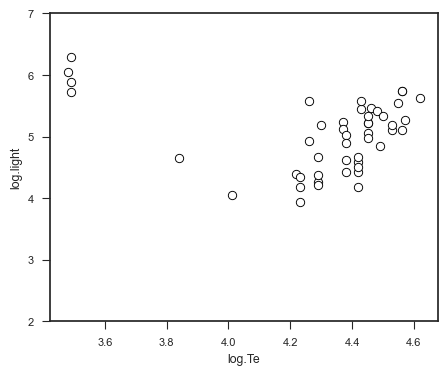

In [4]:
plt.figure(figsize=(5,4))
plt.scatter(log_Te, log_light, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.ylim(2, 7)
plt.show()

In [38]:
mod_ls = model.LinearModel(1)
mod_ls.init_param()
mod_r = model.LinearModel(1)
mod_r.init_param()
mod_m = model.LinearModel(1)
mod_m.init_param()
mod_wm = model.LinearModel(1)
mod_wm.init_param()
# mod_wmr = model.LinearModel(1)
# mod_wmr.init_param()
mod_wmm = model.LinearModel(1)
mod_wmm.init_param()
mod_ls2 = model.LinearModel(1)
mod_ls2.init_param()

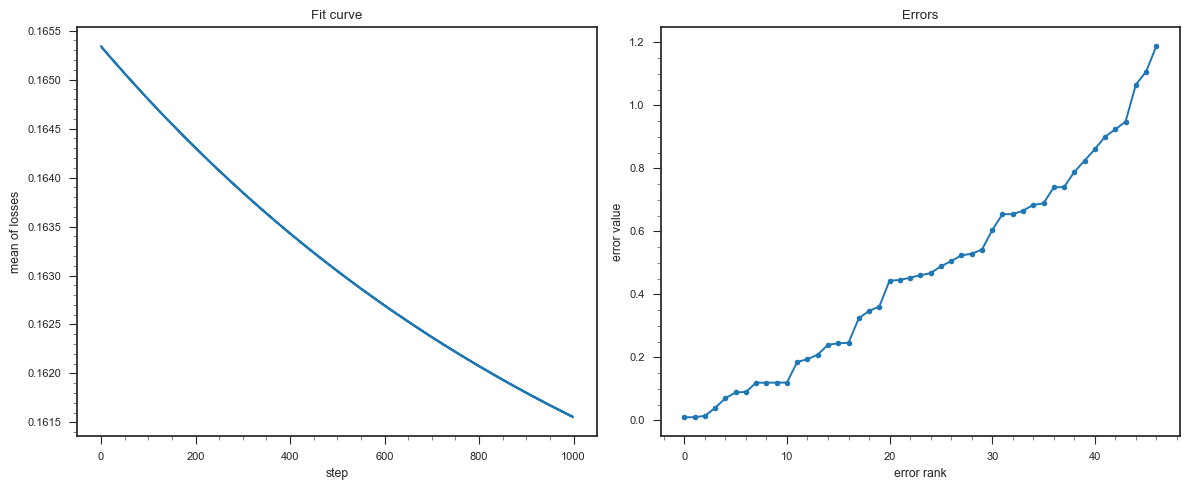

In [42]:
regr_ls = regr.regression(log_Te[:,None], log_light, mod_ls, 
                          h=0.05, n_iter=1000)
regr.plot_losses_and_errors(regr_ls, log_Te[:,None], log_light, logscale=False)

0.254575263719001


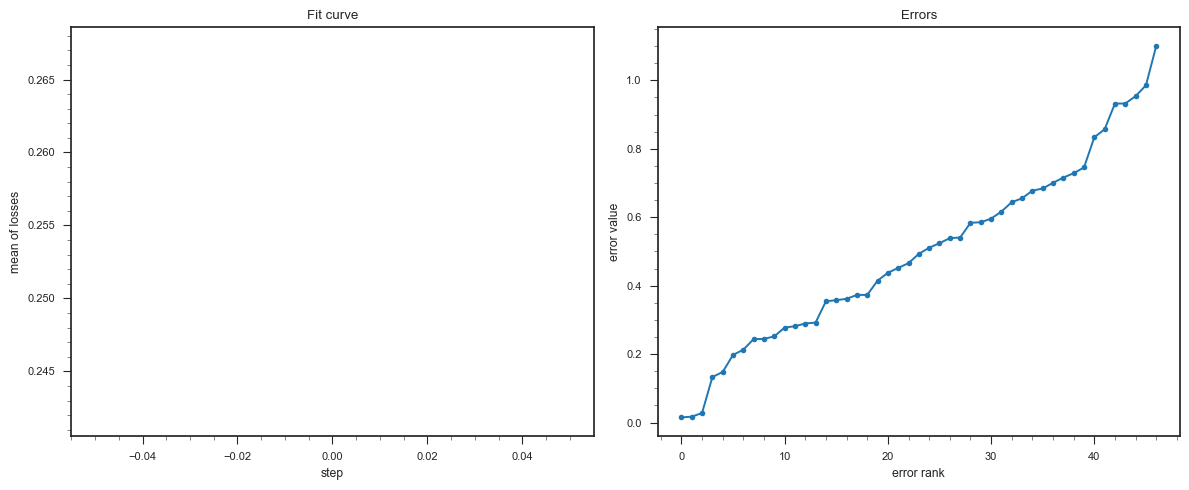

In [45]:
regr_r = regr.r_regression_irls(log_Te[:,None], log_light, mod_r, 
                                func.LogSquare(), h=0.05, n_iter=1000)
regr.plot_losses_and_errors(regr_r, log_Te[:,None], log_light, logscale=False)

0.07265628446312393


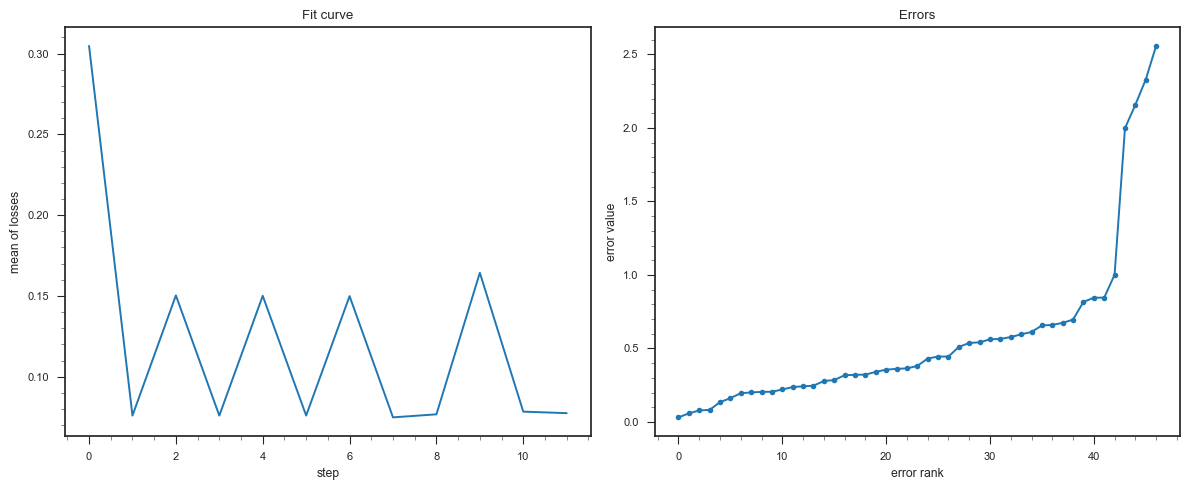

In [48]:
avrfunc_m = regr.averaging_function("M", func.quantile_func(0.5, func.Sqrt(0.001)))
regr_m = regr.m_regression_irls(log_Te[:,None], log_light, mod_m, 
                                agg_func=avrfunc_m, h=0.05, n_iter=1000)
regr.plot_losses_and_errors(regr_m, log_Te[:,None], log_light, logscale=False)

0.08879745754521677


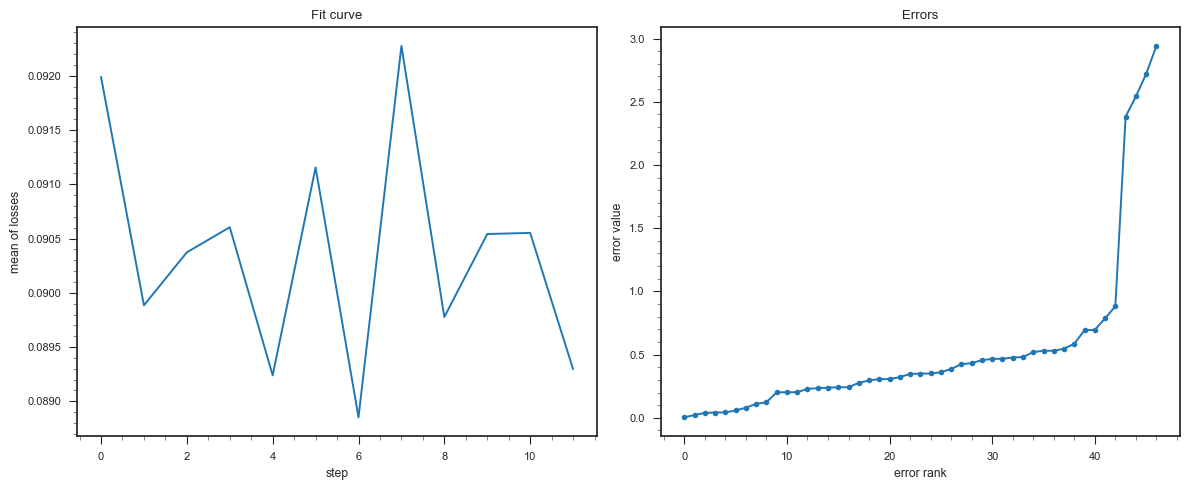

In [52]:
avrfunc_wm = regr.averaging_function("WM", func.quantile_func(0.86, func.Sqrt(0.001)))
regr_wm = regr.m_regression_irls(log_Te[:,None], log_light, mod_wm, 
                                 agg_func=avrfunc_wm, h=0.05, n_iter=1000)
regr.plot_losses_and_errors(regr_wm, log_Te[:,None], log_light, logscale=False)

In [10]:
# avrfunc_wmr = regr.averaging_function("WM", func.quantile_func(0.84, func.Sqrt(0.001)))
# regr_wmr = regr.mr_regression_irls(log_Te[:,None], log_light, mod_wmr, 
#                                    agg_func=avrfunc_wmr, h=0.01, n_iter=1000)
# regr.plot_losses_and_errors(regr_wmr, log_Te[:,None], log_light, logscale=False)

# print(np.asarray(regr_wmr.risk.weights))

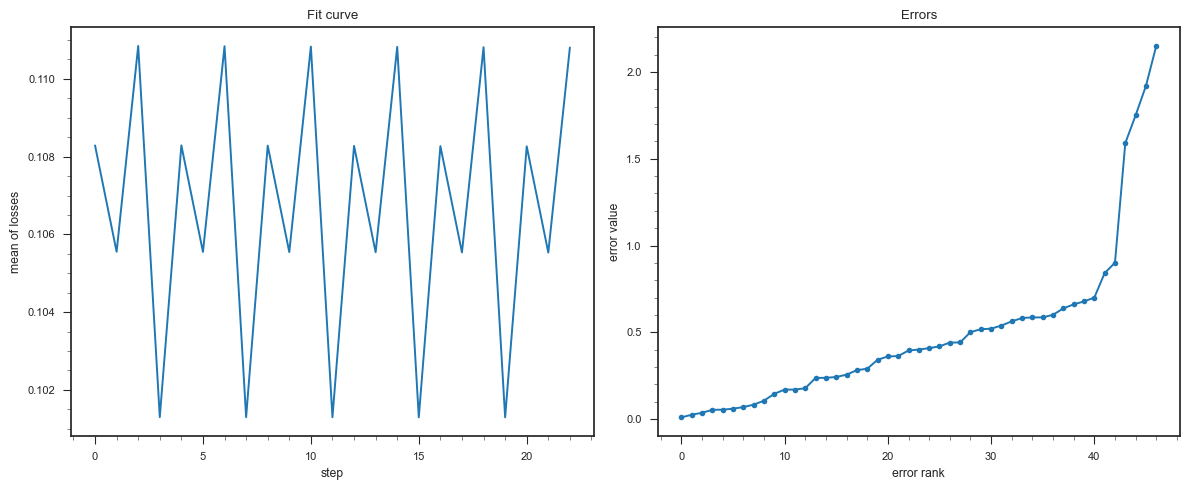

In [54]:
avrfunc_wmm = regr.averaging_function("WM", func.quantile_func(0.86, func.Sqrt(0.001)))
regr_wmm = regr.m_regression(log_Te[:,None], log_light, mod_wmm, 
                                 agg_func=avrfunc_wmm, h=0.05, n_iter=1000)
regr.plot_losses_and_errors(regr_wmm, log_Te[:,None], log_light, logscale=False)

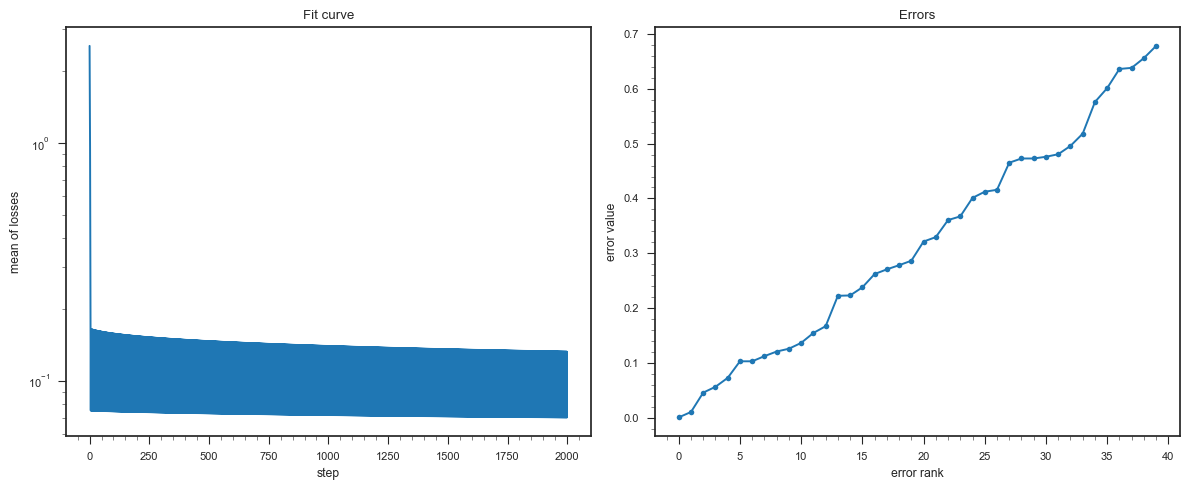

In [55]:
X_wo, Y_wo = regr.exclude_outliers(mod_wm, log_Te, log_light, 7)
regr_ls2 = regr.regression(X_wo[:,None], Y_wo, mod_ls2, h=0.1, n_iter=2000)
regr.plot_losses_and_errors(regr_ls2, X_wo[:,None], Y_wo)

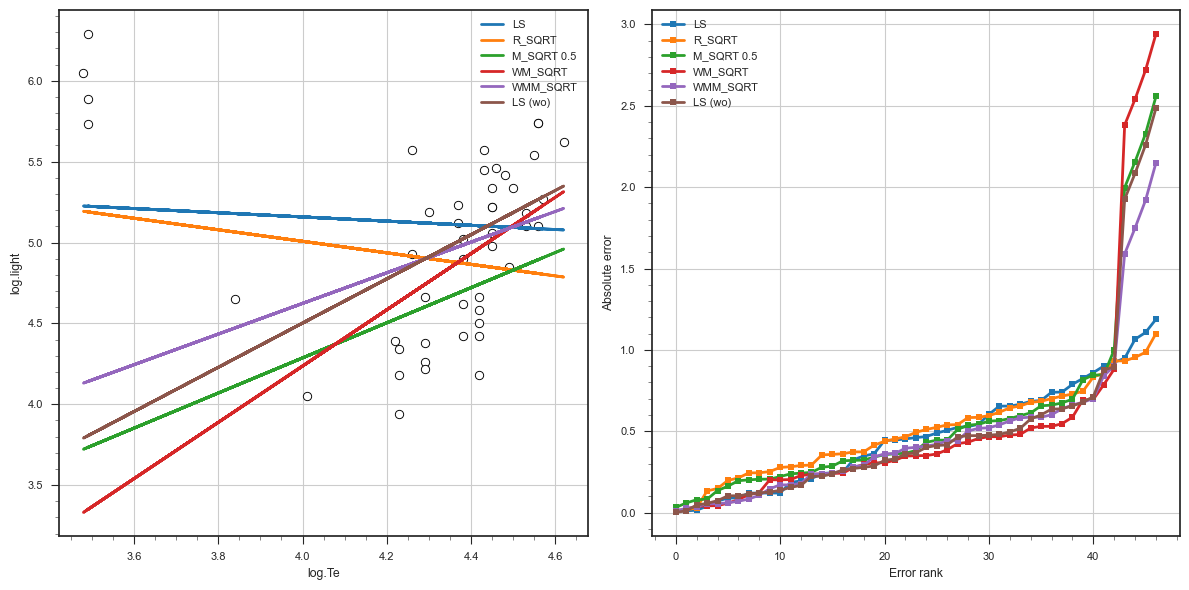

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(log_Te, log_light, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.plot(X[:,None], mod_ls.evaluate_all(X[:,None]), label='LS', linewidth=2.)
plt.plot(X[:,None], mod_r.evaluate_all(X[:,None]), label='R_SQRT', linewidth=2.)
plt.plot(X[:,None], mod_m.evaluate_all(X[:,None]), label='M_SQRT 0.5', linewidth=2.)
plt.plot(X[:,None], mod_wm.evaluate_all(X[:,None]), label='WM_SQRT', linewidth=2.)
# plt.plot(X[:,None], mod_wmr.evaluate_all(X[:,None]), label='WMR_SQRT', linewidth=2.)
plt.plot(X[:,None], mod_wmm.evaluate_all(X[:,None]), label='WMM_SQRT', linewidth=2.)
plt.plot(X[:,None], mod_ls2.evaluate_all(X[:,None]), label='LS (wo)', linewidth=2.)
plt.legend()
plt.minorticks_on()
plt.grid(1)
plt.subplot(1,2,2)
plt.plot(sorted(np.abs(Y-mod_ls.evaluate_all(X[:,None]))), label='LS', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_r.evaluate_all(X[:,None]))), label='R_SQRT', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_m.evaluate_all(X[:,None]))), label='M_SQRT 0.5', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_wm.evaluate_all(X[:,None]))), label='WM_SQRT', linewidth=2., marker='s', markersize=4)
# plt.plot(sorted(np.abs(Y-mod_wmr.evaluate_all(X[:,None]))), label='WMR_SQRT', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_wmm.evaluate_all(X[:,None]))), label='WMM_SQRT', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_ls2.evaluate_all(X[:,None]))), label='LS (wo)', linewidth=2., marker='s', markersize=4)
plt.legend()
plt.minorticks_on()
plt.xlabel('Error rank')
plt.ylabel('Absolute error')
plt.grid(1)
plt.tight_layout()
plt.show()